In [56]:
import pandas as pd
import explanations as ex
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
chodci = pd.read_csv('data/CHODCI.csv',sep=';',encoding='iso-8859-2',names =ex.ped_columns)
chodci.head()

,identifikacni_cislo,kategorie_chodce,stav_chodce,chovani_chodce,situace_v_miste_nehody
0,2100180003,2,9,3,0
1,2100180007,2,1,1,4
2,2100180039,1,9,3,0
3,2100180047,1,2,3,0
4,2100180051,2,1,1,4


In [37]:
li = []

for filename in ex.file_names:
    df = pd.read_csv('data/'+filename,sep=';',encoding='iso-8859-2', index_col=None, names=ex.main_columns)
    df['kraj'] = ex.file_names[filename]
    li.append(df)

t = pd.concat(li, axis=0, ignore_index=True)


chodci = pd.read_csv('data/CHODCI.csv',sep=';',encoding='iso-8859-2', index_col=None, names=ex.ped_columns)

t = pd.merge(t, chodci, left_on='identifikacni_cislo', right_on='identifikacni_cislo', how='left')

t.head()

,identifikacni_cislo,druh_pozemni_komunikace,cislo_pozemni_komunikace,den_mesic_rok,weekday(p2a),cas,druh_nehody,druh_srazky_jedoucich_vozidel,druh_pevne_prekazky,charakter_nehody,...,q,r,s,t,lokalita_nehody,kraj,kategorie_chodce,stav_chodce,chovani_chodce,situace_v_miste_nehody
0,2100180001,6,NaN,2018-01-01,1,2356,1,4,0,2,...,NaN,NaN,NaN,NaN,1,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
1,2100180002,5,NaN,2018-01-01,1,50,3,0,2,2,...,NaN,NaN,NaN,NaN,1,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
2,2100180003,8,NaN,2018-01-01,1,40,4,0,0,1,...,NaN,NaN,NaN,NaN,1,nehody na území hl. m. Prahy,2.0,9.0,3.0,0.0
3,2100180004,5,NaN,2018-01-01,1,114,1,4,0,2,...,NaN,NaN,NaN,NaN,1,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
4,2100180005,6,NaN,2018-01-01,1,232,3,0,4,1,...,NaN,NaN,NaN,NaN,1,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN


Kolik nehod v roce 2018 PČR zaznamenala?

In [38]:
t.nunique()

identifikacni_cislo         104764
druh_pozemni_komunikace          9
cislo_pozemni_komunikace      4268
den_mesic_rok                  365
weekday(p2a)                     7
                             ...  
kraj                            14
kategorie_chodce                 5
stav_chodce                     10
chovani_chodce                   9
situace_v_miste_nehody          11
Length: 69, dtype: int64

In [39]:
t.count()

identifikacni_cislo         104765
druh_pozemni_komunikace     104765
cislo_pozemni_komunikace     47490
den_mesic_rok               104765
weekday(p2a)                104765
                             ...  
kraj                        104765
kategorie_chodce              3732
stav_chodce                   3732
chovani_chodce                3732
situace_v_miste_nehody        3732
Length: 69, dtype: int64

PČR zaznamenala **104764**nehod. Jedno id se v zaznamech vyskytuje dva

Kolik procent zaznamenaných nehod bylo smrtelných?

In [40]:
(t[t['usmrceno_osob'] > 0]['identifikacni_cislo'].count() / t['identifikacni_cislo'].count())*100

0.4858492817257672

Pouze **0.4858%** procent nehod bylo smrtelných.

Kolik lidí zemřelo při srážce s odrazníkem, patníkem, sloupkem dopravní značky apod.?

In [41]:
t[(t['usmrceno_osob'] > 0) & t['druh_pevne_prekazky'] == 3 ]['identifikacni_cislo'].count()

0

Pri srazkach s patniky zemrelo **0** osob.

Kolik procent zaznamenaných nehod, které se staly na kolejích tramvaje, bylo smrtelných?

In [42]:
smrtelnych = t[(t['usmrceno_osob'] > 0) & t['situovani_nehody_na_komunikaci'] == 7 ]['identifikacni_cislo'].count()
vsechny = t[t['situovani_nehody_na_komunikaci'] == 7 ]['identifikacni_cislo'].count()

procenta = (100*smrtelnych)/vsechny

In [43]:
procenta

0.0

Na tramvajovych kolejich nedoslo k **zadne** smrtelne nehode.

Vyberte časté výrobní značky vozidel (např. Škoda, BMW): ty které se účastnily alespoň padesáti nehod. Vykreslete graf, který pro každou častou výrobní značku ukáže procento nehod v zatáčce (vzhledem k celkovému počtu nehod vozidel této značky).

In [44]:
def safeMap(dic, val):
    if val in dic:
        return dic[val]
    else:
        return val

for col in t.columns: 
    if col in ex.decode_key:
        t[col] = t[col].apply(lambda x: safeMap(ex.decode_key[col],x))

t.head()

,identifikacni_cislo,druh_pozemni_komunikace,cislo_pozemni_komunikace,den_mesic_rok,weekday(p2a),cas,druh_nehody,druh_srazky_jedoucich_vozidel,druh_pevne_prekazky,charakter_nehody,...,q,r,s,t,lokalita_nehody,kraj,kategorie_chodce,stav_chodce,chovani_chodce,situace_v_miste_nehody
0,2100180001,komunikace místní,NaN,2018-01-01,1,2356,srážka; s jedoucím nekolejovým vozidlem,zezadu,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; pouze s hmotnou škodou,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
1,2100180002,komunikace sledovaná; (ve vybraných městech),NaN,2018-01-01,1,50,srážka; s pevnou překážkou,nepřichází v úvahu; nejedná se o srážku jedouc...,"sloup; telefonní, veřejného osvětlení, elektri...",nehoda; pouze s hmotnou škodou,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
2,2100180003,"komunikace účelová; ostatní (parkoviště, odpoč...",NaN,2018-01-01,1,40,srážka; s chodcem,nepřichází v úvahu; nejedná se o srážku jedouc...,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; s následky na životě,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,žena,pod vlivem alkoholu; obsah alkoholu v krvi 1 ?...,"náhlé vstoupení do vozovky; z chodníku, krajnice",jiná situace
3,2100180004,komunikace sledovaná; (ve vybraných městech),NaN,2018-01-01,1,114,srážka; s jedoucím nekolejovým vozidlem,zezadu,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; pouze s hmotnou škodou,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
4,2100180005,komunikace místní,NaN,2018-01-01,1,232,srážka; s pevnou překážkou,nepřichází v úvahu; nejedná se o srážku jedouc...,svodidlo,nehoda; s následky na životě,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN


In [45]:
t.to_csv(r'data/clean-2018.csv')

C:\programs\miniconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


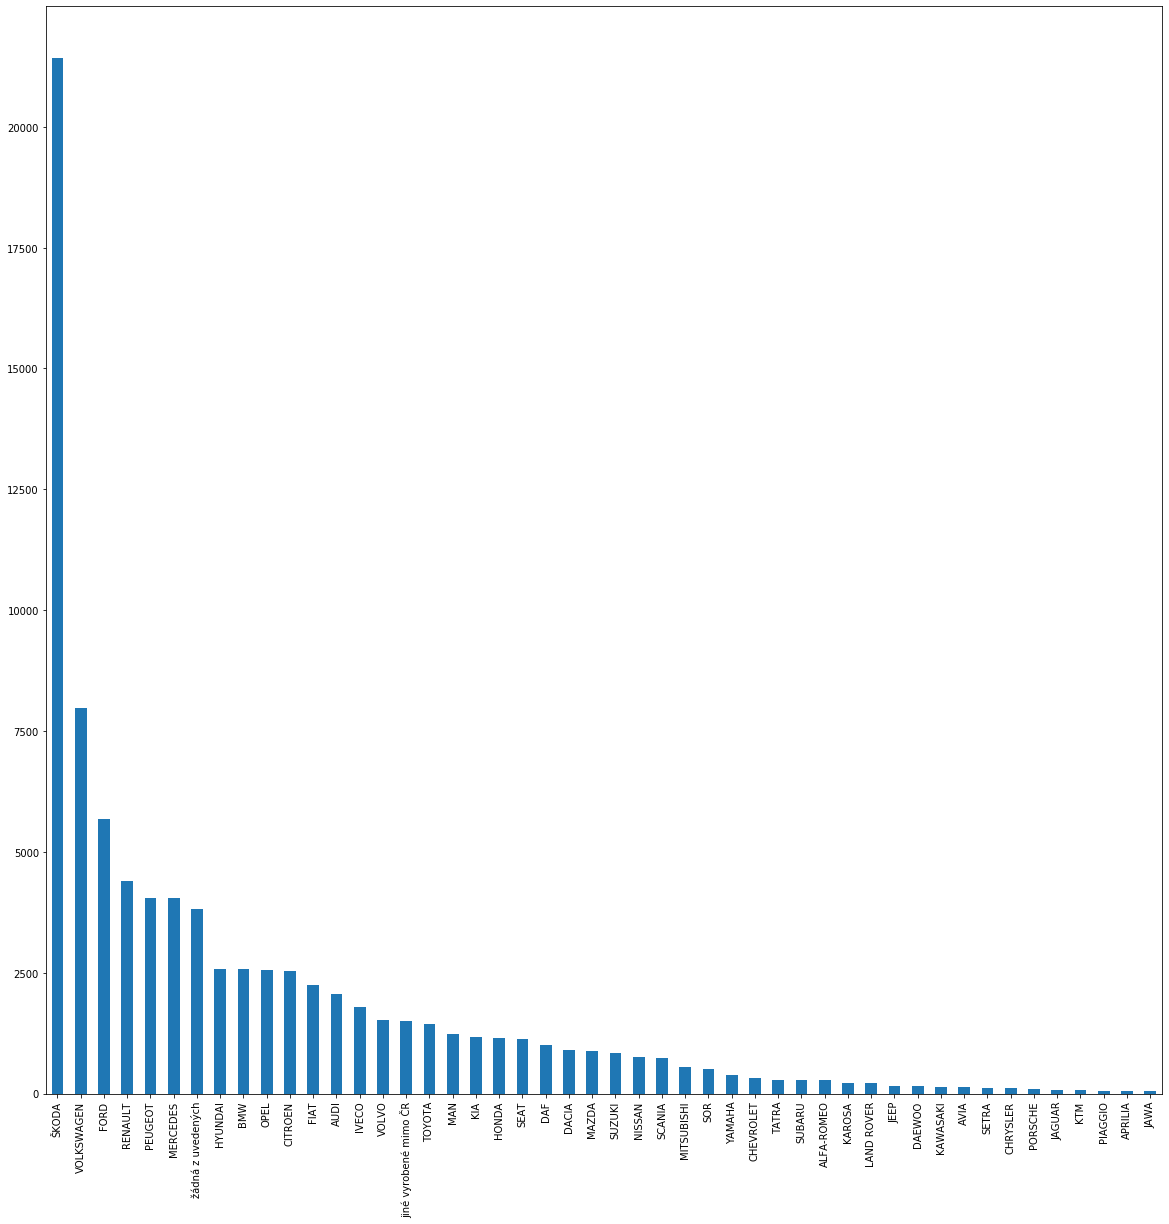

In [46]:
frequent = t['vyrobni_znacka_motoroveho_vozidla'].value_counts().where(lambda x : x > 50).dropna()
frequent.plot('bar',figsize = (20,20))

C:\programs\miniconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


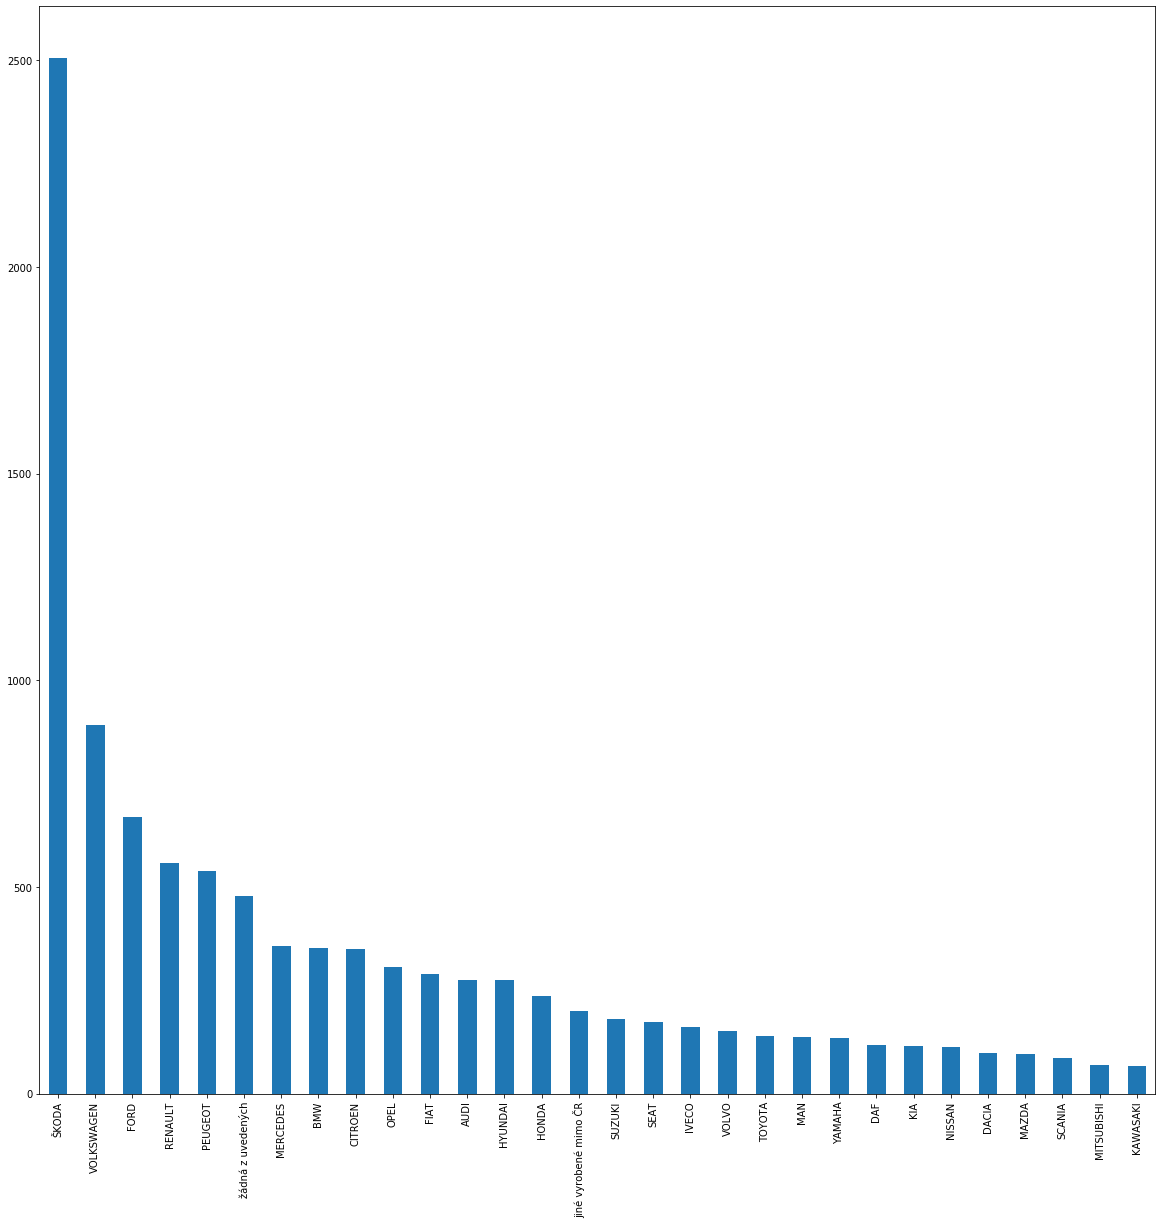

In [47]:
curve= t[t['smerove_pomery']=='zatáčka']['vyrobni_znacka_motoroveho_vozidla'].value_counts().where(lambda x : x>50).dropna()
curve.plot('bar',figsize = (20,20))

In [48]:
ratio = curve/frequent

Vyberte časté výrobní značky vozidel (např. Škoda, BMW): ty které se účastnily alespoň padesáti nehod. Vykreslete graf, který pro každou častou výrobní značku ukáže procento nehod v zatáčce (vzhledem k celkovému počtu nehod vozidel této značky).

C:\programs\miniconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


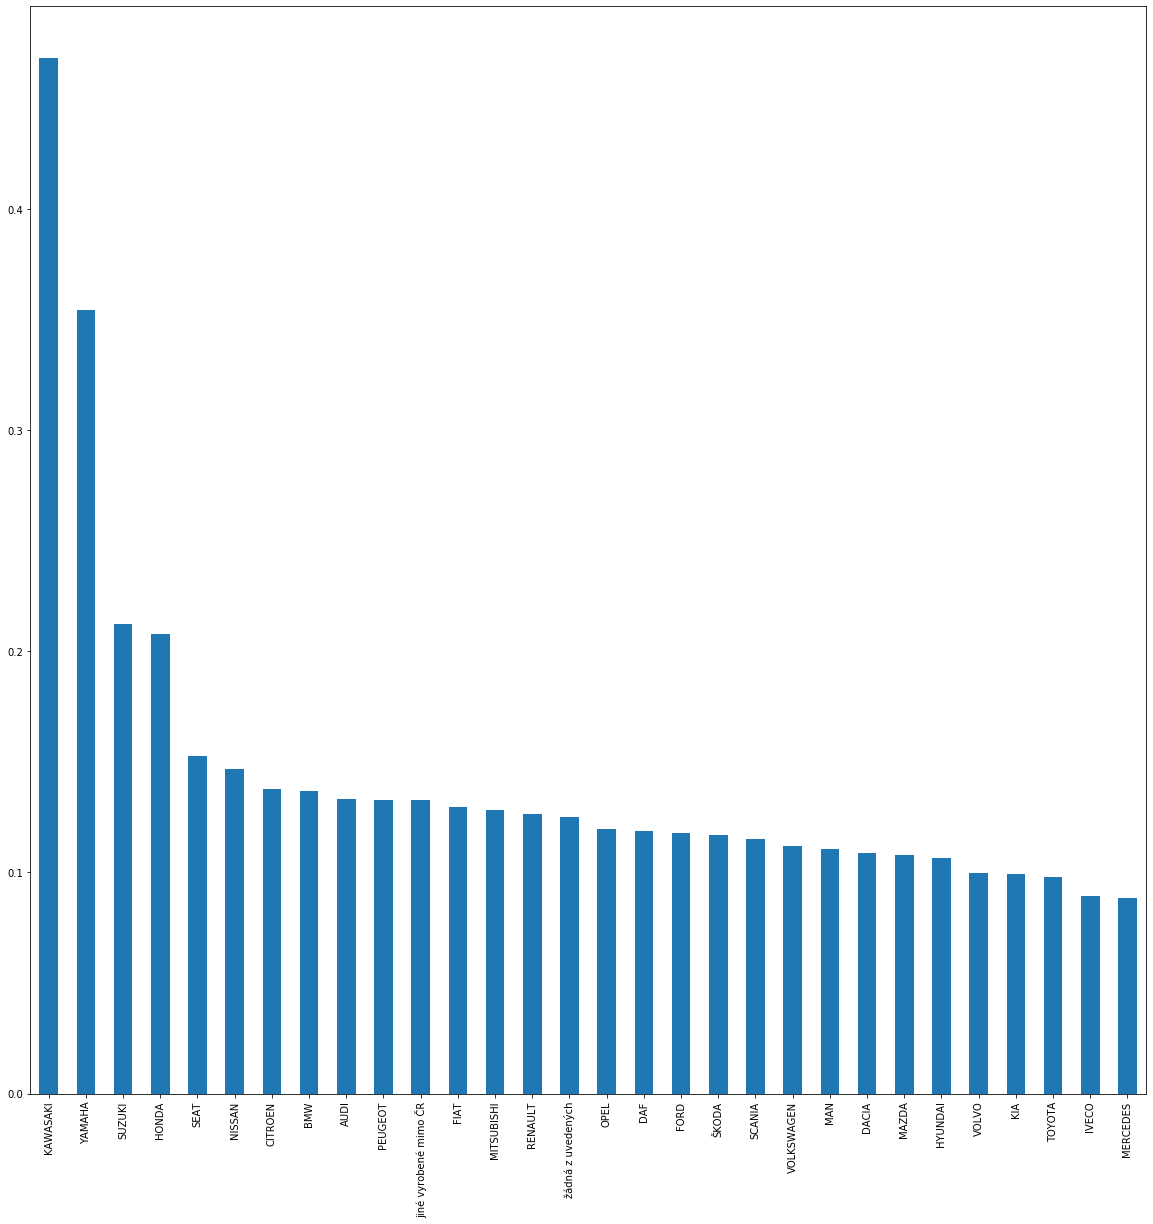

In [49]:
ratio.sort_values(ascending = False).dropna().plot('bar',figsize = (20,20))

Je videt ze u vyrobců motocyklů je pomer nehod v zatáčce zdaleka nejvyšší.

In [67]:
corr = t.corrwith(t['celkova_hmotna_skoda'], axis=0, drop=False, method='pearson')

C:\programs\miniconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


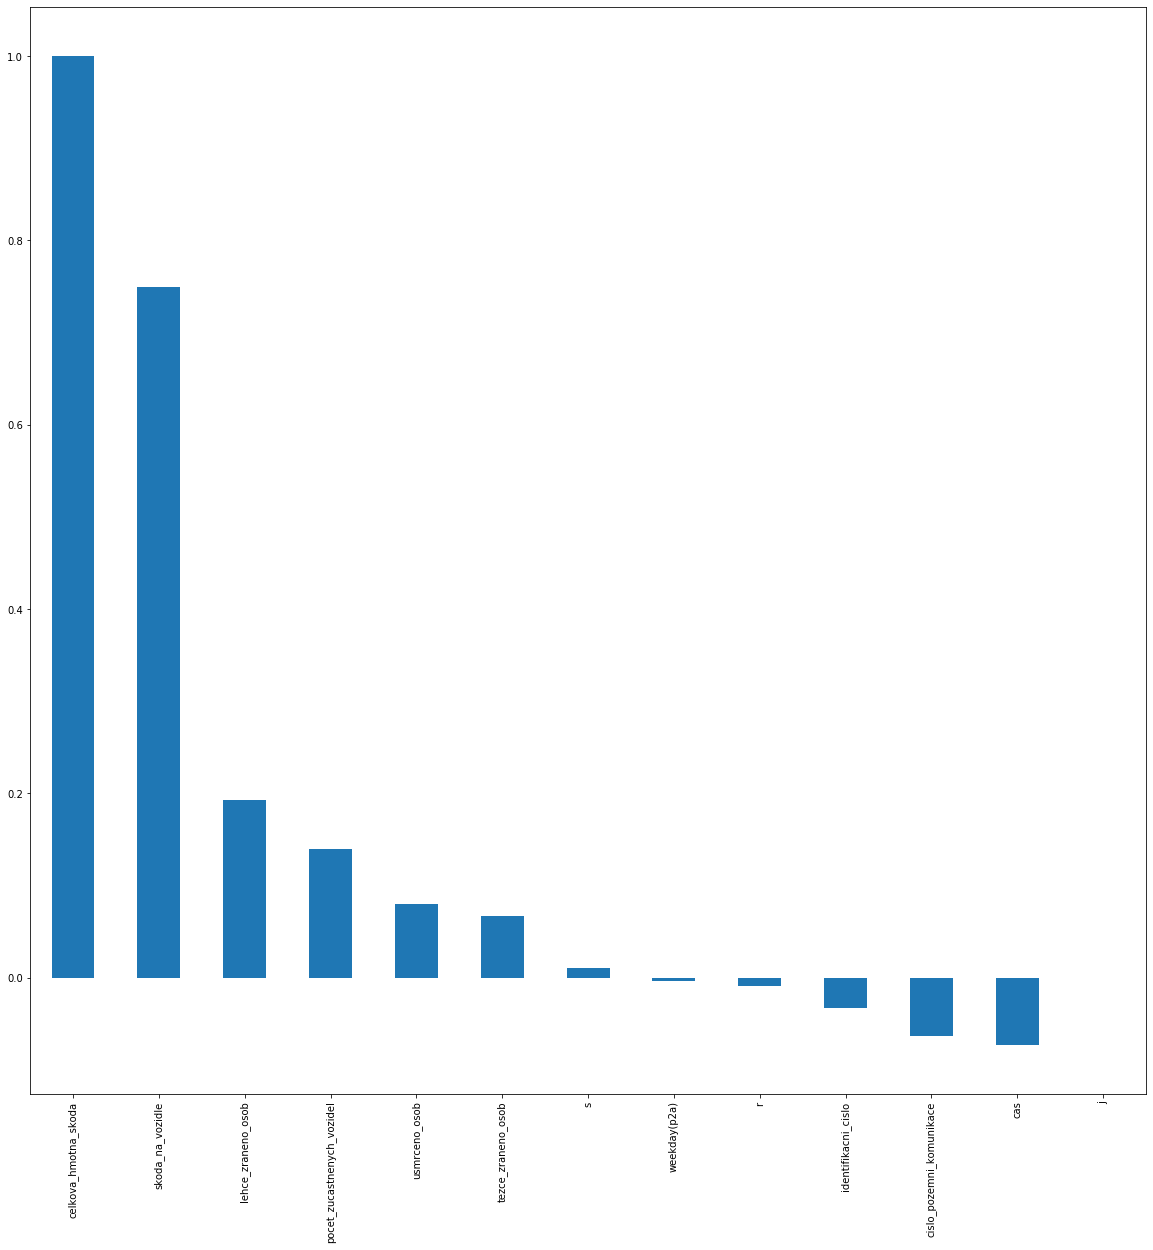

In [70]:
corr.sort_values(ascending = False).plot('bar',figsize = (20,20))